In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [393]:
# All relevant libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [394]:
df = pd.read_csv('D:\credit-score-classification-app-main\data\processed\Processed_data.csv')
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.120,1824.843,3,4,3.000,4.000,3,7.000,...,Good,809.980,26.823,No,49.575,118.280,High_spent_Small_value_payments,312.494,Good,265
1,23,Scientist,19114.120,1824.843,3,4,3.000,4.000,-1,0.000,...,Good,809.980,31.945,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,265
2,5,Scientist,19114.120,1824.843,3,4,3.000,4.000,3,7.000,...,Good,809.980,28.609,No,49.575,118.280,Low_spent_Medium_value_payments,331.210,Good,267
3,23,Scientist,19114.120,1824.843,3,4,3.000,4.000,5,4.000,...,Good,809.980,31.378,No,49.575,118.280,Low_spent_Small_value_payments,223.451,Good,268
4,23,Scientist,19114.120,1824.843,3,4,3.000,4.000,6,0.000,...,Good,809.980,24.797,No,49.575,118.280,High_spent_Medium_value_payments,341.489,Good,269


In [349]:
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88949 entries, 0 to 88948
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        88949 non-null  int64  
 1   Occupation                 88949 non-null  object 
 2   Annual_Income              88949 non-null  float64
 3   Monthly_Inhand_Salary      88949 non-null  float64
 4   Num_Bank_Accounts          88949 non-null  int64  
 5   Num_Credit_Card            88949 non-null  int64  
 6   Interest_Rate              88949 non-null  float64
 7   Num_of_Loan                88949 non-null  float64
 8   Delay_from_due_date        88949 non-null  int64  
 9   Num_of_Delayed_Payment     88949 non-null  float64
 10  Changed_Credit_Limit       88949 non-null  float64
 11  Num_Credit_Inquiries       88949 non-null  float64
 12  Credit_Mix                 88949 non-null  object 
 13  Outstanding_Debt           88949 non-null  flo

In [395]:
df["Credit_Score"] = LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Score"]

0        0
1        0
2        0
3        0
4        0
        ..
88944    1
88945    1
88946    1
88947    2
88948    1
Name: Credit_Score, Length: 88949, dtype: int32

In [396]:
df["Credit_Score"].value_counts()

Credit_Score
2    46822
1    26077
0    16050
Name: count, dtype: int64

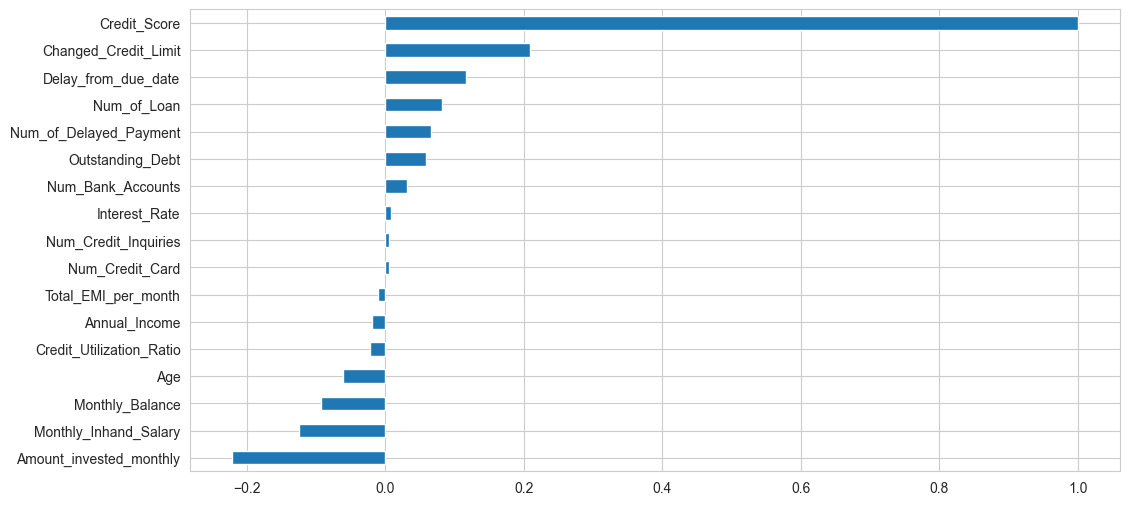

In [397]:
# Correlation of target variable with features after numerical transformation 
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Credit_Score'][:-1].sort_values()
correlation_series.plot.barh();

## Encoding for categorical columns¶

In [398]:
# select columns of type 'object'
df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [399]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])

In [400]:
#credit_mix_categories = ['Bad', 'Standard', 'Good']
#credit_mix_encoder = OrdinalEncoder(categories=[credit_mix_categories])
label_encoder = OrdinalEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df[['Credit_Mix']])


In [401]:
label_encoder = LabelEncoder()
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [358]:
df['Occupation']

0        12
1        12
2        12
3        12
4        12
         ..
88944     9
88945     9
88946     9
88947     9
88948     9
Name: Occupation, Length: 88949, dtype: int32

In [402]:
X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score
y.value_counts(normalize=True)

Credit_Score
2   0.526
1   0.293
0   0.180
Name: proportion, dtype: float64

## SMOTE

In [403]:
from imblearn.over_sampling import SMOTE

 # Synthetic Minority Oversampling Technique

smote = SMOTE()
X, y = smote.fit_resample(X,y)

## Train-Test Split

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, shuffle=True, random_state=42)

In [362]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (98326, 21) (98326,)
Testing set shape: (42140, 21) (42140,)


### Normalization

In [405]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [364]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [365]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,12,19114.120,1824.843,3,4,3.000,4.000,3,7.000,...,1.000,809.980,26.823,1,49.575,118.280,3.000,312.494,0,265
1,23,12,19114.120,1824.843,3,4,3.000,4.000,-1,0.000,...,1.000,809.980,31.945,1,49.575,118.280,2.000,284.629,0,265
2,5,12,19114.120,1824.843,3,4,3.000,4.000,3,7.000,...,1.000,809.980,28.609,1,49.575,118.280,1.000,331.210,0,267
3,23,12,19114.120,1824.843,3,4,3.000,4.000,5,4.000,...,1.000,809.980,31.378,1,49.575,118.280,0.000,223.451,0,268
4,23,12,19114.120,1824.843,3,4,3.000,4.000,6,0.000,...,1.000,809.980,24.797,1,49.575,118.280,4.000,341.489,0,269


## Huấn luyện Model

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,  
    RandomForestClassifier,
    StackingClassifier,
    AdaBoostClassifier
)
from xgboost import XGBClassifier

In [367]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
prediction = logistic_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12075   247  1724]
 [ 1932  8710  3405]
 [ 3166  3069  7812]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     14046
           1       0.72      0.62      0.67     14047
           2       0.60      0.56      0.58     14047

    accuracy                           0.68     42140
   macro avg       0.68      0.68      0.67     42140
weighted avg       0.68      0.68      0.67     42140



In [368]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
prediction = DT_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[11954   651  1441]
 [  637 11111  2299]
 [ 1578  2400 10069]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     14046
           1       0.78      0.79      0.79     14047
           2       0.73      0.72      0.72     14047

    accuracy                           0.79     42140
   macro avg       0.79      0.79      0.79     42140
weighted avg       0.79      0.79      0.79     42140



In [369]:
RF_model = RandomForestClassifier(n_estimators=45)
RF_model.fit(X_train, y_train)
prediction = RF_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[13405    40   601]
 [  354 12768   925]
 [ 1472  1904 10671]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     14046
           1       0.87      0.91      0.89     14047
           2       0.87      0.76      0.81     14047

    accuracy                           0.87     42140
   macro avg       0.87      0.87      0.87     42140
weighted avg       0.87      0.87      0.87     42140



In [370]:
GB_model = GradientBoostingClassifier(n_estimators=45)
GB_model.fit(X_train, y_train)
prediction = GB_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12668   118  1260]
 [ 1935 10799  1313]
 [ 2586  2958  8503]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     14046
           1       0.78      0.77      0.77     14047
           2       0.77      0.61      0.68     14047

    accuracy                           0.76     42140
   macro avg       0.76      0.76      0.75     42140
weighted avg       0.76      0.76      0.75     42140



In [371]:
AD_model = AdaBoostClassifier(random_state=43)
AD_model.fit(X_train, y_train)
prediction = AD_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12520   217  1309]
 [ 2089  9106  2852]
 [ 2487  2301  9259]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     14046
           1       0.78      0.65      0.71     14047
           2       0.69      0.66      0.67     14047

    accuracy                           0.73     42140
   macro avg       0.74      0.73      0.73     42140
weighted avg       0.74      0.73      0.73     42140



In [406]:
XGB_model = XGBClassifier(random_state=43)
XGB_model.fit(X_train, y_train)
prediction = XGB_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[13048   113   885]
 [  691 11842  1514]
 [ 1549  1947 10551]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     14046
           1       0.85      0.84      0.85     14047
           2       0.81      0.75      0.78     14047

    accuracy                           0.84     42140
   macro avg       0.84      0.84      0.84     42140
weighted avg       0.84      0.84      0.84     42140



In [407]:
import pickle
pickle.dump(XGB_model, open('../models/model.pkl', 'wb'))
pickle.dump(scaler, open('../models/scaler.pkl', 'wb')) 

In [374]:
from sklearn.linear_model import RidgeClassifier
models = {
    "DecisionTrees": DecisionTreeClassifier(max_depth=10),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGB": XGBClassifier(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier()
}
model = StackingClassifier(list(models.items()),final_estimator=RidgeClassifier(alpha=1.0))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

KeyboardInterrupt: 

## CNN

In [377]:
# Without using BatchNormalization()

model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])


early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=60,
                               restore_best_weights=True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=900,
          verbose=1,
          callbacks=[early_stopping])


Epoch 1/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6037 - loss: 0.9933 - val_accuracy: 0.5826 - val_loss: 0.9498
Epoch 2/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7177 - loss: 0.7156 - val_accuracy: 0.5861 - val_loss: 0.8830
Epoch 3/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7272 - loss: 0.6951 - val_accuracy: 0.7310 - val_loss: 0.6687
Epoch 4/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7292 - loss: 0.6839 - val_accuracy: 0.7408 - val_loss: 0.6518
Epoch 5/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7326 - loss: 0.6747 - val_accuracy: 0.7375 - val_loss: 0.6538
Epoch 6/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7331 - loss: 0.6724 - val_accuracy: 0.7410 - val_loss: 0.6464
Epoch 7/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7335 - loss: 0.6678 - val_accuracy: 0.7413 - val_loss: 0.6445
Epoch 8/900
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7360 - loss: 0.6632 - 

In [379]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 512)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,619 (2.52 MB)

 Trainable params: 219,395 (857.01 KB)

 Non-trainable params: 2,432 (9.50 KB)

 Optimizer params: 438,792 (1.67 MB)

In [ ]:
model.evaluate(X_train, y_train)

3073/3073 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8917 - loss: 0.2942


[0.29285064339637756, 0.8923072218894958]

In [ ]:
eval_metric(model, X_train, y_train, X_test, y_test)

3073/3073 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Set:
[[13311    54   681]
 [  290 12438  1319]
 [ 1772  2486  9789]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     14046
           1       0.83      0.89      0.86     14047
           2       0.83      0.70      0.76     14047

    accuracy                           0.84     42140
   macro avg       0.84      0.84      0.84     42140
weighted avg       0.84      0.84      0.84     42140


Train Set:
[[31953    33   790]
 [  234 30626  1915]
 [ 3025  4592 25158]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     32776
           1       0.87      0.93      0.90     32775
           2       0.90      0.77      0.83     32775

    accuracy                           0.89     98326
   macro avg       0.89      0.89      0.89     98326
weighted avg       0.89      0.89      0.89     98326



## FT TRANSFORMER

In [ ]:
from tabtransformertf.utils.preprocessing import build_categorical_prep
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer

In [ ]:
df = pd.read_csv('D:\credit-score-classification-app-main\data\processed\Processed_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88949 entries, 0 to 88948
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        88949 non-null  int64  
 1   Occupation                 88949 non-null  object 
 2   Annual_Income              88949 non-null  float64
 3   Monthly_Inhand_Salary      88949 non-null  float64
 4   Num_Bank_Accounts          88949 non-null  int64  
 5   Num_Credit_Card            88949 non-null  int64  
 6   Interest_Rate              88949 non-null  float64
 7   Num_of_Loan                88949 non-null  float64
 8   Delay_from_due_date        88949 non-null  int64  
 9   Num_of_Delayed_Payment     88949 non-null  float64
 10  Changed_Credit_Limit       88949 non-null  float64
 11  Num_Credit_Inquiries       88949 non-null  float64
 12  Credit_Mix                 88949 non-null  object 
 13  Outstanding_Debt           88949 non-null  flo

In [ ]:
CATEGORICAL_FEATURES = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']
NUMERIC_FEATURES = [
    'Age', 
    'Annual_Income', 
    'Monthly_Inhand_Salary', 
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',    
    'Changed_Credit_Limit',      
    'Num_Credit_Inquiries','Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age_Months']
FEATURES = CATEGORICAL_FEATURES + NUMERIC_FEATURES
TARGET_FEATURE = 'Credit_Score'

In [ ]:
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
df[NUMERIC_FEATURES] = df[NUMERIC_FEATURES].astype(float)


In [ ]:
sc = StandardScaler()
sc.fit(df[NUMERIC_FEATURES])
df[NUMERIC_FEATURES]= sc.transform(df[NUMERIC_FEATURES])
df[TARGET_FEATURE] = LabelEncoder().fit_transform(df[TARGET_FEATURE])
df[TARGET_FEATURE] = df[TARGET_FEATURE].astype(int)


In [ ]:
train_data, val_data = train_test_split(df, test_size=0.4, shuffle=True, random_state=8)
val_data,test_data = train_test_split(val_data, test_size=0.4, shuffle=True, random_state=12)

In [ ]:
def df_to_dataset(
    dataframe: pd.DataFrame,
    target: str = None,
    shuffle: bool = True,
    batch_size: int = 512,
):
    df = dataframe.copy()
    
    if target:
        labels = df.pop(target)
        dataset = {key: tf.expand_dims(value, axis=-1) for key, value in df.items()}
        dataset = tf.data.Dataset.from_tensor_slices((dict(dataset), labels))
    else:
        dataset = {key: tf.expand_dims(value, axis=-1) for key, value in df.items()}
        dataset = tf.data.Dataset.from_tensor_slices(dict(dataset))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))
        
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset

train_dataset = df_to_dataset(train_data[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=True, batch_size=512)
val_dataset = df_to_dataset(val_data[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=False, batch_size=512)

In [ ]:
category_prep_layers = build_categorical_prep(train_data, CATEGORICAL_FEATURES)

100%|██████████| 4/4 [00:00<00:00, 130.81it/s]


In [ ]:
ft_linear_encoder = FTTransformerEncoder(
    numerical_features=NUMERIC_FEATURES,  
    categorical_features=CATEGORICAL_FEATURES,  
    numerical_data=df[NUMERIC_FEATURES].values,
    categorical_data=train_data[[col for col in train_data.columns if col.startswith(tuple(CATEGORICAL_FEATURES))]].values,
    y = df[TARGET_FEATURE].values,
)

# Pass the encoder to the model
ft_model = FTTransformer(
    encoder=ft_linear_encoder,  # Encoder from above
    out_dim=3,  # Number of classes
    out_activation='sigmoid',  # Softmax activation for multi-class 
)

epochs = 100
lr = 0.001
weight_decay = 0.0001
optimizer = tf.optimizers.AdamW(
        learning_rate=lr, weight_decay=weight_decay
)
ft_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10)

In [ ]:
history = ft_model.fit(
    train_dataset,
    epochs=epochs,
    verbose=1,
    batch_size=512,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.6338 - loss: 0.7838 - val_accuracy: 0.6929 - val_loss: 0.6975
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 349ms/step - accuracy: 0.6895 - loss: 0.6957 - val_accuracy: 0.6993 - val_loss: 0.6742
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 333ms/step - accuracy: 0.6987 - loss: 0.6798 - val_accuracy: 0.6817 - val_loss: 0.6754
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 346ms/step - accuracy: 0.6947 - loss: 0.6676 - val_accuracy: 0.6979 - val_loss: 0.6619
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - accuracy: 0.7038 - loss: 0.6608 - val_accuracy: 0.7090 - val_loss: 0.6563
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.7090 - loss: 0.6540 - val_accuracy: 0.7102 - val_loss: 0.6532
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - accuracy: 0.7133 - loss: 0.6488 - val_accuracy: 0.7117 - val_loss: 0.6481
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 33s 313ms/step - accuracy: 0.7109 -

In [ ]:
ft_model.evaluate(val_dataset)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7341 - loss: 0.6640


[0.6748055815696716, 0.7282180786132812]

In [ ]:
predicted_probabilities = ft_model.predict(val_dataset)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
predicted_classes = np.argmax(predicted_probabilities, axis=1)
true_labels = val_data[TARGET_FEATURE].values


In [ ]:
conf_matrix = confusion_matrix(true_labels,predicted_classes )
# Print the confusion matrix
print(conf_matrix)
print(classification_report(true_labels,predicted_classes))

[[2400  136 1285]
 [ 173 4620 1435]
 [ 975 1798 8526]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      3821
           1       0.70      0.74      0.72      6228
           2       0.76      0.75      0.76     11299

    accuracy                           0.73     21348
   macro avg       0.71      0.71      0.71     21348
weighted avg       0.73      0.73      0.73     21348



## Hypeparameter Tuning


In [ ]:
from hyperopt import hp, fmin, tpe, Trials,space_eval

In [ ]:
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(1, 10)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
}

In [ ]:
def objective(params):
    model = XGBClassifier(random_state=43, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy 
  
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,  # Số lần thử nghiệm
            trials=trials)
best_params = space_eval(space, best)
print("Best parameters found:")
print(best_params)


100%|██████████| 100/100 [14:48<00:00,  8.89s/trial, best loss: -0.8867109634551495]
Best parameters found:
{'colsample_bytree': 0.9507511951321894, 'gamma': 0.22171766682953004, 'learning_rate': 0.07933059917020413, 'max_depth': 8, 'min_child_weight': 6.461867531176054, 'n_estimators': 868, 'subsample': 0.9001647197082663}


In [ ]:
final_model = XGBClassifier(**best_params, random_state=43)
final_model.fit(X_train, y_train)
prediction = final_model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[13255    47   744]
 [  200 12762  1085]
 [ 1024  1674 11349]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14046
           1       0.88      0.91      0.89     14047
           2       0.86      0.81      0.83     14047

    accuracy                           0.89     42140
   macro avg       0.89      0.89      0.89     42140
weighted avg       0.89      0.89      0.89     42140



1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


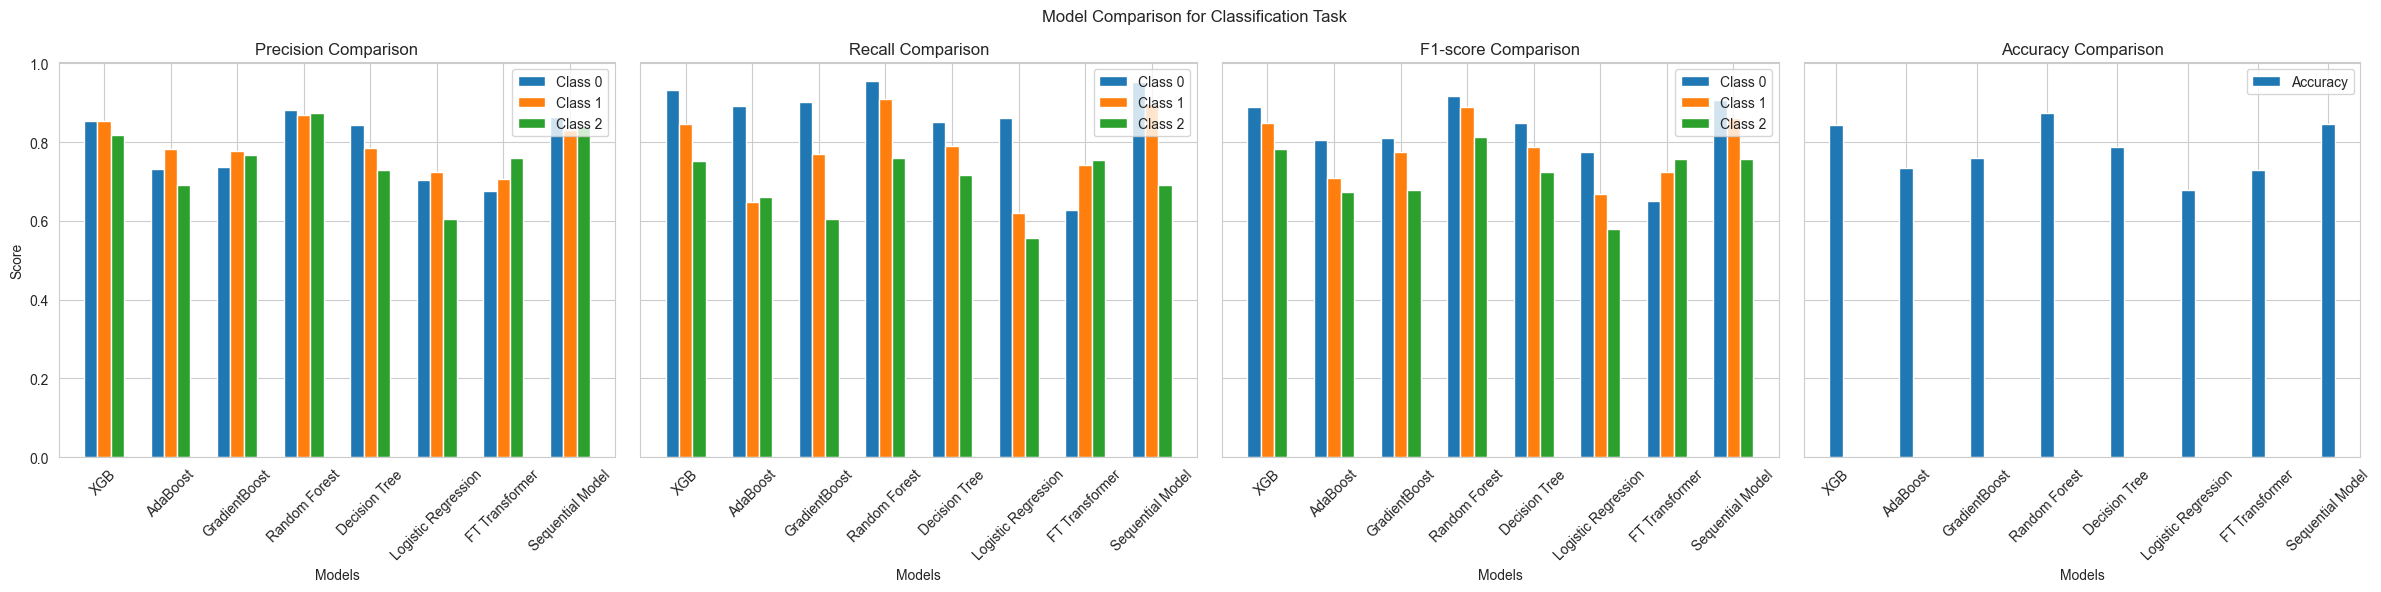

In [383]:
y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=1)

reports = {
    'XGB': classification_report(y_test, XGB_model.predict(X_test), output_dict=True),
    'AdaBoost': classification_report(y_test, AD_model.predict(X_test), output_dict=True),
    'GradientBoost': classification_report(y_test, GB_model.predict(X_test), output_dict=True),
    'Random Forest': classification_report(y_test, RF_model.predict(X_test), output_dict=True),
    'Decision Tree': classification_report(y_test, DT_model.predict(X_test), output_dict=True),
    'Logistic Regression': classification_report(y_test, logistic_model.predict(X_test), output_dict=True),
    'FT Transformer': classification_report(true_labels,predicted_classes, output_dict=True),
    'Sequential Model': classification_report(y_test, y_pred, output_dict=True)
}
accuracies = {
    'XGB': accuracy_score(y_test, XGB_model.predict(X_test)),
    'AdaBoost': accuracy_score(y_test, AD_model.predict(X_test)),
    'GradientBoost': accuracy_score(y_test, GB_model.predict(X_test)),
    'Random Forest': accuracy_score(y_test, RF_model.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, DT_model.predict(X_test)),
    'Logistic Regression': accuracy_score(y_test, logistic_model.predict(X_test)),
    'FT Transformer': accuracy_score(true_labels,predicted_classes),
    'Sequential Model': accuracy_score(y_test, y_pred)
}

# Tổ chức dữ liệu cho biểu đồ
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1', '2']
data = {metric: {cls: [] for cls in classes} for metric in metrics}
data['accuracy'] = []

for model_name, report in reports.items():
    for metric in metrics:
        for cls in classes:
            data[metric][cls].append(report[cls][metric])
    data['accuracy'].append(accuracies[model_name])

data['model_names'] = list(reports.keys())
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

x = np.arange(len(data['model_names']))
width = 0.2

# Vẽ các biểu đồ cho từng metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    for j, cls in enumerate(classes):
        ax.bar(x + j * width, data[metric][cls], width, label=f'Class {cls}')
    ax.set_xlabel('Models')
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_xticks(x + width)
    ax.set_xticklabels(data['model_names'], rotation=45)
    ax.legend()

# Vẽ biểu đồ cho accuracy
ax = axes[3]
ax.bar(x, data['accuracy'], width, label='Accuracy')
ax.set_xlabel('Models')
ax.set_title('Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(data['model_names'], rotation=45)
ax.legend()

axes[0].set_ylabel('Score')
fig.suptitle('Model Comparison for Classification Task')
plt.tight_layout()
plt.show()

In [390]:
reports = {
    'XGB': classification_report(y_test, XGB_model.predict(X_test), output_dict=True),
    'AdaBoost': classification_report(y_test, AD_model.predict(X_test), output_dict=True),
    'GradientBoost': classification_report(y_test, GB_model.predict(X_test), output_dict=True),
    'Random Forest': classification_report(y_test, RF_model.predict(X_test), output_dict=True),
    'Decision Tree': classification_report(y_test, DT_model.predict(X_test), output_dict=True),
    'Logistic Regression': classification_report(y_test, logistic_model.predict(X_test), output_dict=True),
    'FT Transformer': classification_report(true_labels,predicted_classes, output_dict=True),
    'Sequential Model': classification_report(y_test, y_pred, output_dict=True)
}
accuracies = {
    'XGB': accuracy_score(y_test, XGB_model.predict(X_test)),
    'AdaBoost': accuracy_score(y_test, AD_model.predict(X_test)),
    'GradientBoost': accuracy_score(y_test, GB_model.predict(X_test)),
    'Random Forest': accuracy_score(y_test, RF_model.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, DT_model.predict(X_test)),
    'Logistic Regression': accuracy_score(y_test, logistic_model.predict(X_test)),
    'FT Transformer': accuracy_score(true_labels,predicted_classes),
    'Sequential Model': accuracy_score(y_test, y_pred)
}

rows = []

for model_name, report in reports.items():
    row = {'Model': model_name, 'Accuracy': accuracies[model_name]}
    for cls in ['0', '1', '2']:
        row[f'Precision_{cls}'] = report[cls]['precision']
        row[f'Recall_{cls}'] = report[cls]['recall']
        row[f'F1-Score_{cls}'] = report[cls]['f1-score']

    rows.append(row)

df = pd.DataFrame(rows)


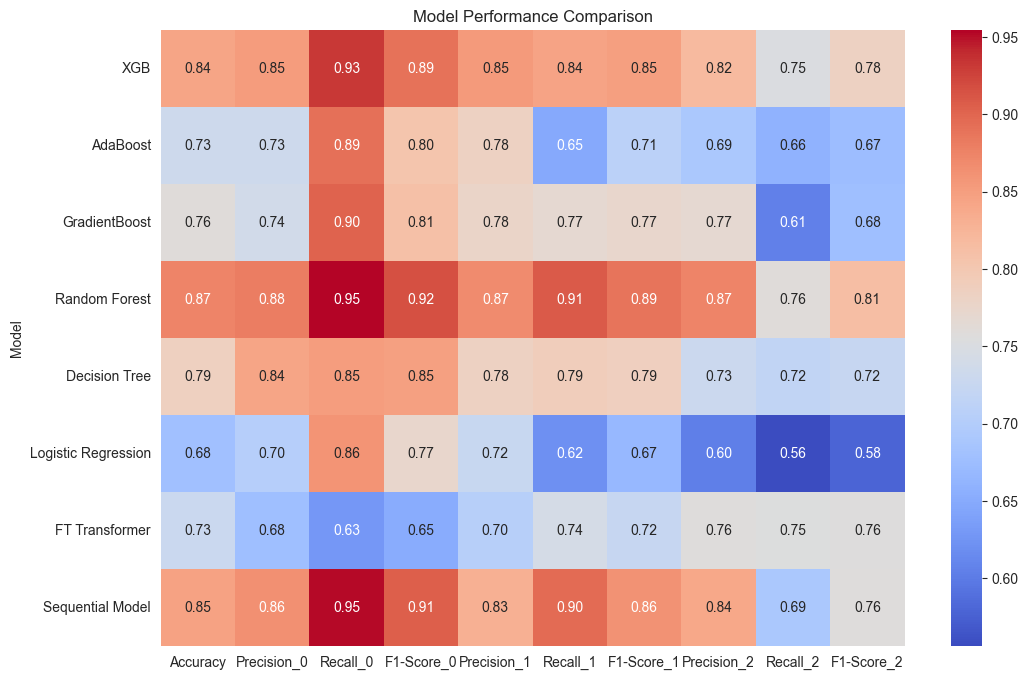

In [391]:
df
df.set_index('Model', inplace=True)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Model Performance Comparison')
plt.show()